# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
# reference: weather_stats_solution.ipynb
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
# reference: weather_stats_solution.ipynb
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    # reference: weather_stats_solution.ipynb
    # reference: https://openweathermap.org/current#name
    city_url = f"{url}q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        # reference: weather_stats_solution.ipynb
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        # reference: weather_stats_solution.ipynb
        # reference: https://openweathermap.org/current#example_JSON
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bilibino
Processing Record 2 of Set 1 | ribeira grande
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | christchurch
Processing Record 5 of Set 1 | bage
Processing Record 6 of Set 1 | riyadh
Processing Record 7 of Set 1 | wailua homesteads
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | kodiak
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | gardnerville ranchos
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | axim
Processing Record 16 of Set 1 | howrah
Processing Record 17 of Set 1 | lihue
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | obock
Processing Record 20 of Set 1 | qaqortoq
Processing Record 21 of Set 1 | blackmans bay
Processing Record 22 of Set 1 | kavaratti
Processing Record 2

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bilibino,68.0546,166.4372,242.73,98,{'all': 100},1.16,RU,1736631366
1,ribeira grande,38.5167,-28.7000,293.37,83,{'all': 75},13.89,PT,1736631368
2,albany,42.6001,-73.9662,270.73,74,{'all': 99},5.36,US,1736631346
3,christchurch,-43.5333,172.6333,288.10,70,{'all': 100},7.20,NZ,1736631370
4,bage,-31.3314,-54.1069,300.03,44,{'all': 0},8.23,BR,1736631371


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [2]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,242.73,98,{'all': 100},1.16,RU,1736631366
1,ribeira grande,38.5167,-28.7000,293.37,83,{'all': 75},13.89,PT,1736631368
2,albany,42.6001,-73.9662,270.73,74,{'all': 99},5.36,US,1736631346
3,christchurch,-43.5333,172.6333,288.10,70,{'all': 100},7.20,NZ,1736631370
4,bage,-31.3314,-54.1069,300.03,44,{'all': 0},8.23,BR,1736631371


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

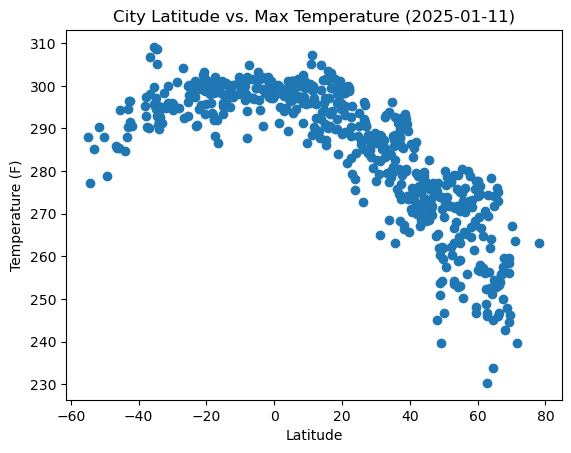

In [3]:
# reference: weather_stats_solution.ipynb
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature (2025-01-11)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

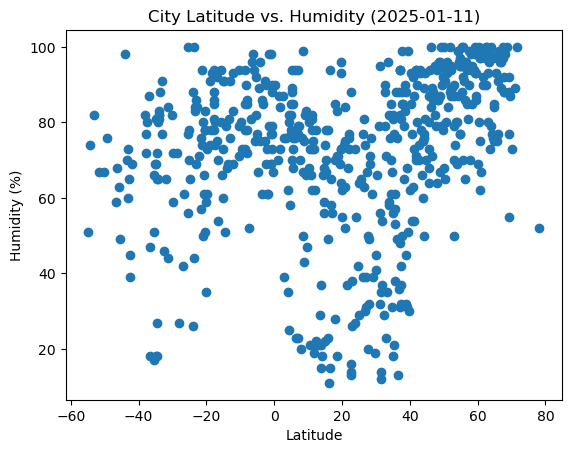

In [4]:
# reference: weather_stats_solution.ipynb
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (2025-01-11)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

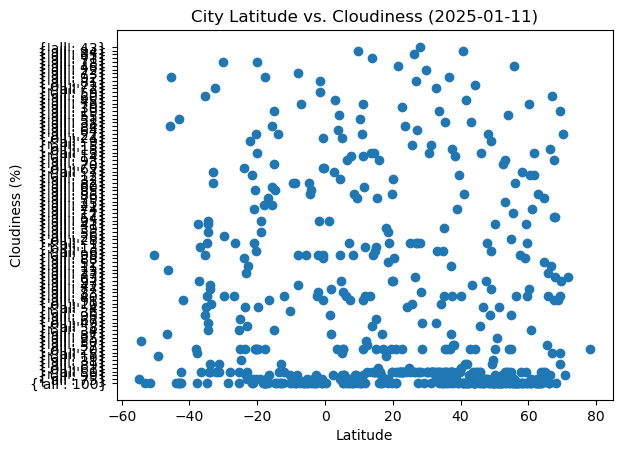

In [5]:
# reference: weather_stats_solution.ipynb
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness (2025-01-11)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

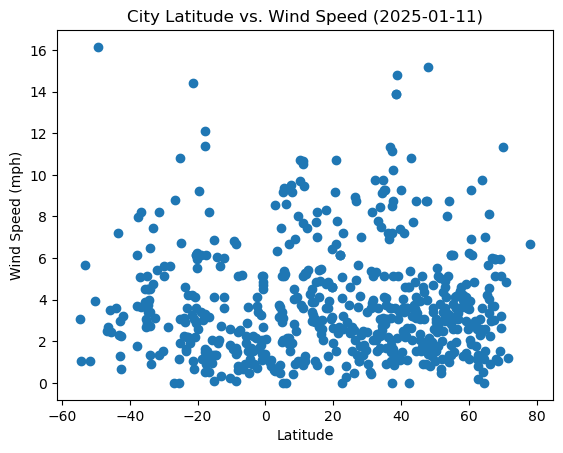

In [6]:
# reference: weather_stats_solution.ipynb
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed (2025-01-11)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [7]:
# Define a function to create Linear Regression plots
# optional step, according to rubric

In [8]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,242.73,98,{'all': 100},1.16,RU,1736631366
1,ribeira grande,38.5167,-28.7000,293.37,83,{'all': 75},13.89,PT,1736631368
2,albany,42.6001,-73.9662,270.73,74,{'all': 99},5.36,US,1736631346
5,riyadh,24.6877,46.7219,288.22,42,{'all': 61},3.74,SA,1736631372
6,wailua homesteads,22.0669,-159.3780,298.78,77,{'all': 0},6.17,US,1736631373


In [9]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,christchurch,-43.5333,172.6333,288.10,70,{'all': 100},7.20,NZ,1736631370
4,bage,-31.3314,-54.1069,300.03,44,{'all': 0},8.23,BR,1736631371
9,carnarvon,-24.8667,113.6333,297.95,65,{'all': 31},6.72,AU,1736631376
10,port-aux-francais,-49.3500,70.2167,278.84,76,{'all': 16},16.15,TF,1736631378
12,puerto natales,-51.7236,-72.4875,290.40,67,{'all': 100},1.03,CL,1736631380


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7374891714859916


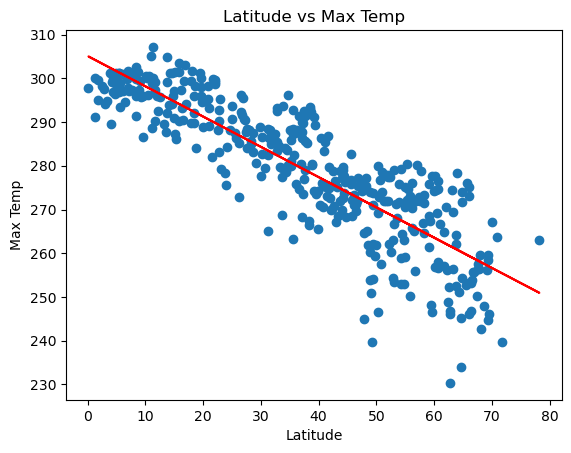

In [17]:
# Linear regression on Northern Hemisphere
# reference: weather_stats_solution.ipynb
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title(f"Latitude vs Max Temp")

print(f"The r^2-value is: {rvalue**2}")

plt.show()

The r^2-value is: 0.25758256577239513


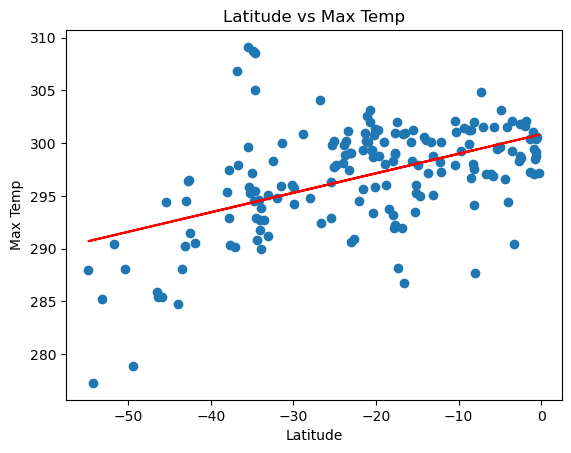

In [18]:
# Linear regression on Southern Hemisphere
# reference: weather_stats_solution.ipynb
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title(f"Latitude vs Max Temp")

print(f"The r^2-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** In the northern hemisphere, the max temp decreases as the latitude increases. In the southern hemisphere, the max temp increases as the latitude increases. The southern hemisphere's relationship seems less strong compared to the northern hemisphere's relationship.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.20249217380852835


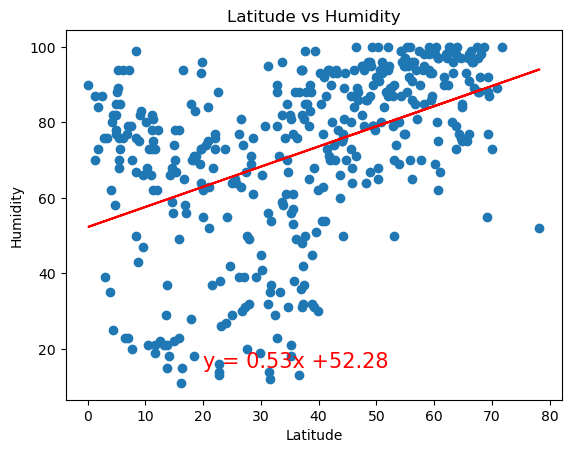

In [19]:
# Northern Hemisphere
# reference: weather_stats_solution.ipynb
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title(f"Latitude vs Humidity")

print(f"The r^2-value is: {rvalue**2}")

plt.show()

The r^2-value is: 0.12105406674806635


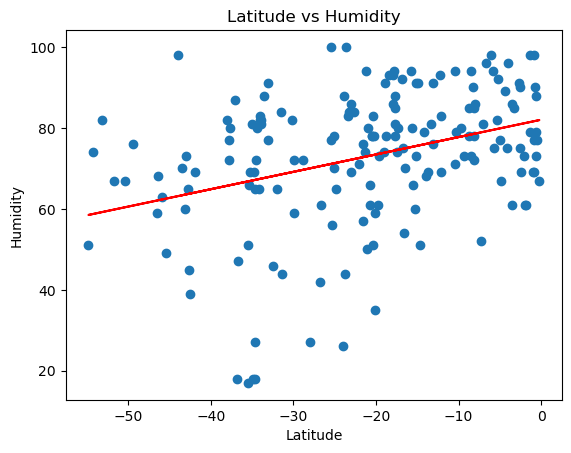

In [20]:
# Southern Hemisphere
# reference: weather_stats_solution.ipynb
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title(f"Latitude vs Humidity")

print(f"The r^2-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** In the northern and southern hemisphere, the humidity increases as the latitude increases. The r^2 for both are on the lower end, meaning the relationship between x (latitude) and y (humidity) for either hemisphere is not as strong.

### Cloudiness vs. Latitude Linear Regression Plot

In [22]:
# Northern Hemisphere
# reference: weather_stats_solution.ipynb
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title(f"Latitude vs Cloudiness")

print(f"The r^2-value is: {rvalue**2}")

plt.show()

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [23]:
# Southern Hemisphere
# reference: weather_stats_solution.ipynb
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title(f"Latitude vs Cloudiness")

print(f"The r^2-value is: {rvalue**2}")

plt.show()

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

**Discussion about the linear relationship:** For the northern and southern hemisphere, a line does not adequately describe the points of the data on the visualizations. Both of the low r^2 further confirm that there is no linear relationship between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0048873726145669035


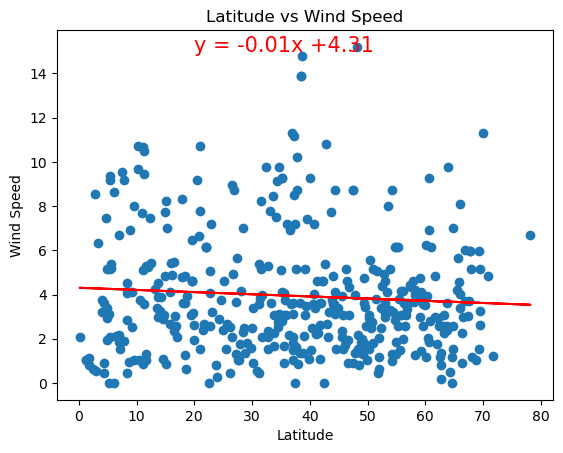

In [24]:
# Northern Hemisphere
# reference: weather_stats_solution.ipynb
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title(f"Latitude vs Wind Speed")

print(f"The r^2-value is: {rvalue**2}")

plt.show()

The r^2-value is: 0.04216451449349423


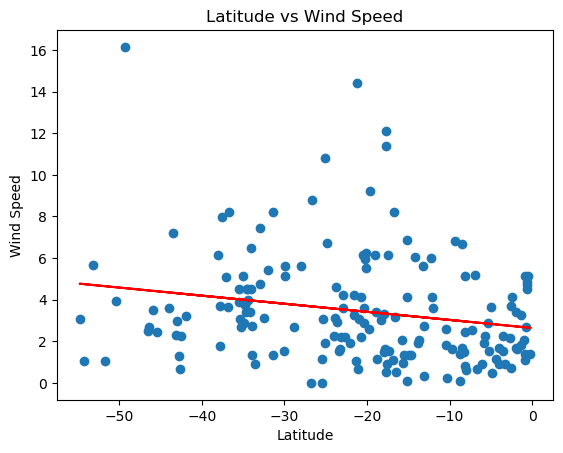

In [25]:
# Southern Hemisphere
# reference: weather_stats_solution.ipynb
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title(f"Latitude vs Wind Speed")

print(f"The r^2-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** For the northern and southern hemisphere, the lines' slopes are very low; though they do show a slight decrease, the decrease is not significant enough to be called a relationship in my opinion. Both of the very low r^2 further confirm latitude and wind speed's lack of linear relationship.